In [8]:
from sklearn.metrics import accuracy_score, recall_score, f1_score, roc_auc_score, confusion_matrix, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
import matplotlib.pyplot as plt
import numpy as np




In [9]:
X, y = make_classification(n_samples=200, n_features=2, n_redundant=0, n_clusters_per_class=1, n_classes=2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Стандартизація ознак
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Створення та навчання моделі (логістичної регресії, в даному випадку)
model = LogisticRegression()
model.fit(X_train, y_train)

# Прогнозування на тестовому наборі
y_pred = model.predict(X_test)

In [10]:
accuracy = accuracy_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred)

print(f"Точність: {accuracy:.2f}")
print(f"Відгук: {recall:.2f}")
print(f"F1-середнє: {f1:.2f}")
print(f"AUC-ROC: {roc_auc:.2f}")

Точність: 0.88
Відгук: 1.00
F1-середнє: 0.87
AUC-ROC: 0.89


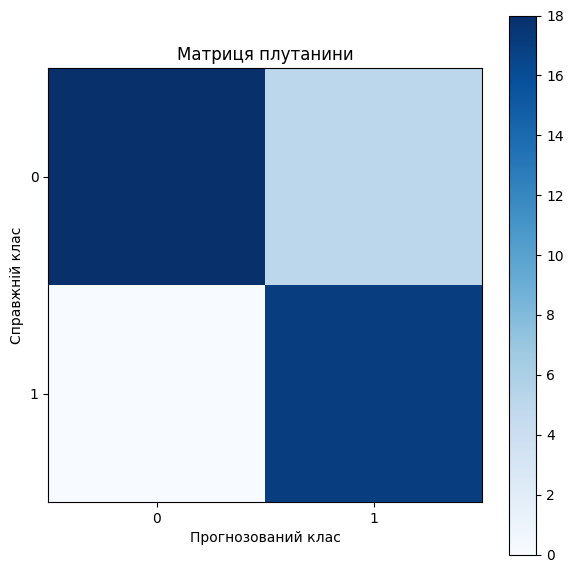

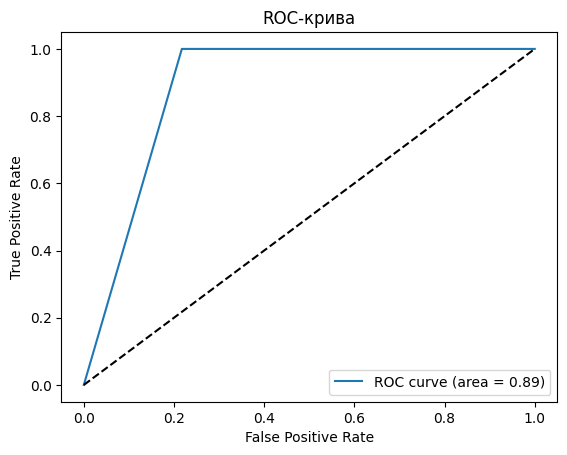

In [11]:
# Матриця плутанини
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(7,7))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Матриця плутанини')
plt.colorbar()

tick_marks = np.arange(2)
plt.xticks(tick_marks, [0, 1])
plt.yticks(tick_marks, [0, 1])
plt.ylabel('Справжній клас')
plt.xlabel('Прогнозований клас')
plt.show()

# Графік ROC-кривої
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
plt.plot(fpr, tpr,  label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-крива')
plt.legend(loc="lower right")
plt.show()